

# **Histogramas**



In [9]:
!pip install mplcursors
!pip install plotly

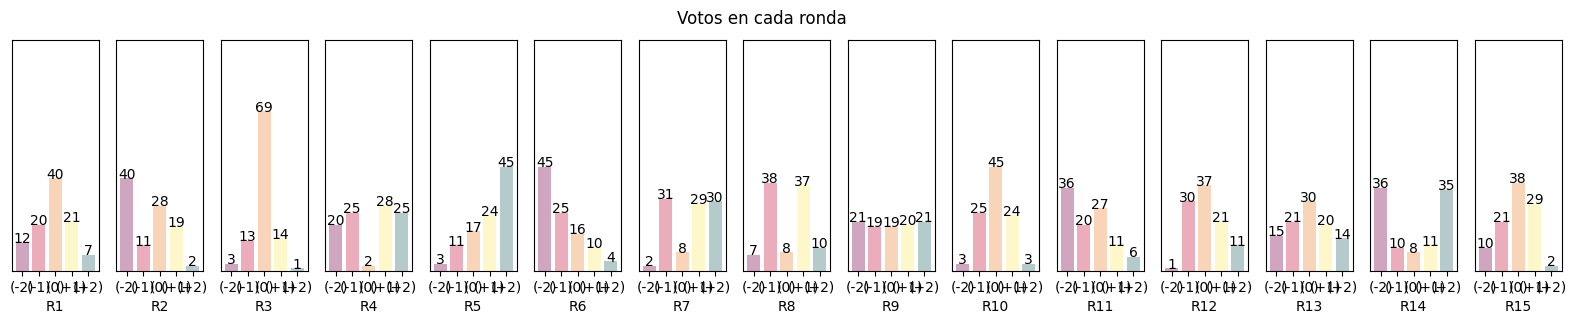

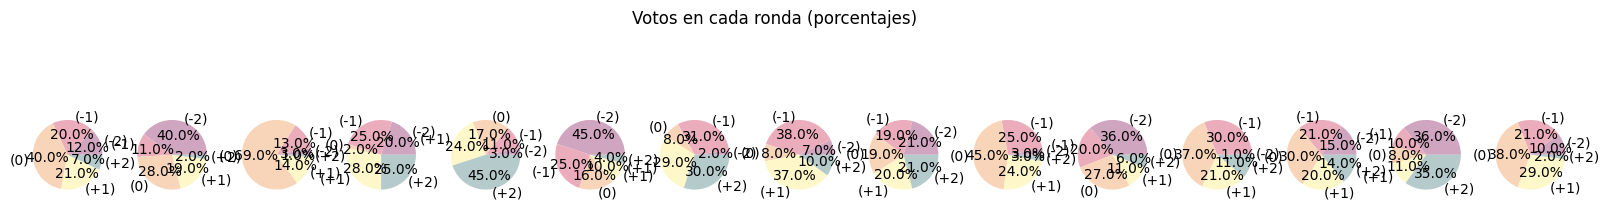

In [32]:
import pandas as pd
import mplcursors  # Importa la biblioteca mplcursors
import matplotlib.pyplot as plt

# Input Data
########################################
dataset = pd.read_excel('datosHisto.xlsx', sheet_name='Hoja1')
NUMROWS = len(dataset.index)
NUMROUNDS = NUMROWS
COLORS = ['#d0a5c0','#ebadbc','#f8d5b9', '#fef7c9', '#b5cacb', '#b5cacb', '#f5a87d'] * 10
FIGSIZE = (20,3)
LTITLES_SHORT = [ '(-2)' , '(-1)', '(0)', '(+1)' , '(+2)']


rows = [ dataset.loc[i, :].values.flatten().tolist() for i in dataset.index ]
data = [ {'data' : row[1:16]} for row in rows ]

roundlabels = dataset['RONDA'].values.tolist()


########################################
# Results and plot
########################################
plt.style.context('fivethirtyeight')
YLIM = [0, sum(data[0]['data'])]

## Answers (using bars) in each round

fig, axes = plt.subplots(1, NUMROUNDS, figsize=FIGSIZE)
fig.subplots_adjust(hspace=0.75)
for i, d in enumerate(data):
    axes[i].set_ylim(YLIM)
    axes[i].bar(LTITLES_SHORT,d['data'],color = COLORS)
    axes[i].set_xlabel(f'R{i+1}')

    axes[i].tick_params(left = False, right = False , labelleft = False )
    for idx, value in enumerate(d['data']):
        axes[i].text(idx,value,str(value),ha = 'center')

fig.suptitle('Votos en cada ronda')
fig.savefig('2.png')

## Answers for each round (using pie charts)

fig, axes = plt.subplots(1, NUMROUNDS, figsize=FIGSIZE)
fig.subplots_adjust(hspace=0.75)
for i, d in enumerate(data):
    #plt.subplot(1,NUMROWS, 1+i)
    #axes[i].set_ylim(YLIM)
    axes[i].pie(d['data'],labels= LTITLES_SHORT, autopct='%1.1f%%', colors = COLORS)
    axes[i].tick_params(left = False, right = False , labelleft = False )

fig.suptitle('Votos en cada ronda (porcentajes)')
fig.savefig('3.png')

# Computing Esteban and Ray (E&R)
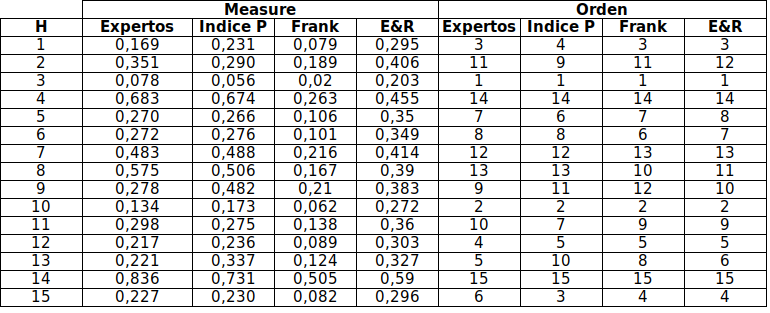

[0.2953909030671922, 0.4055262696700663, 0.20340698733108373, 0.4553229326882525, 0.3501191995681992, 0.34888776467946747, 0.4137513067238637, 0.3896260561230719, 0.3833051307113162, 0.27159156050523425, 0.35993696229743055, 0.3028094173782648, 0.3267618011854152, 0.589899203198586, 0.2964012674558429]
    RONDA  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0       1          12          20          40          21           7
1       2          40          11          28          19           2
2       3           3          13          69          14           1
3       4          20          25           2          28          25
4       5           3          11          17          24          45
5       6          45          25          16          10           4
6       7           2          31           8          29          30
7       8           7          38           8          37          10
8       9          21          19          19          20         

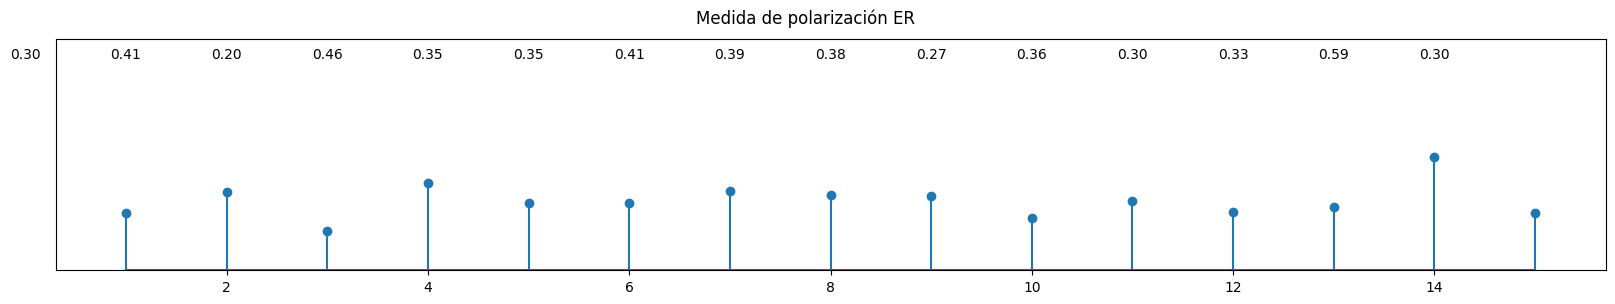

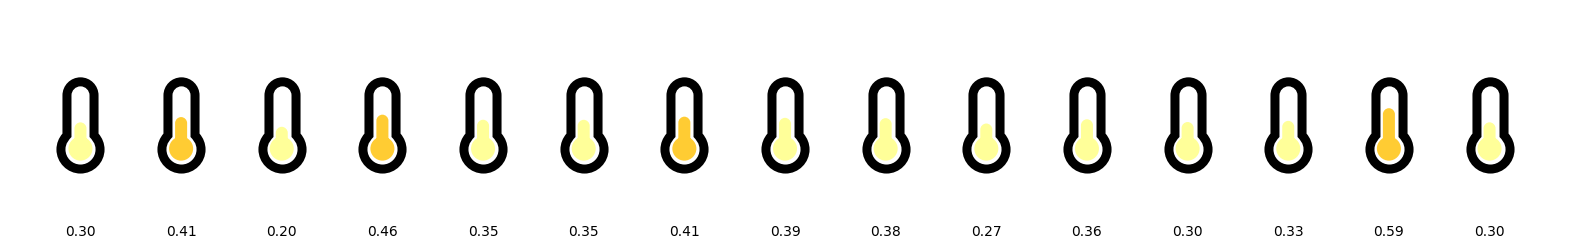

In [19]:
#Computing Esteban and Ray (E&R) polarization measures for different rounds. This
#notebook was used in the Promueva event at Javeriana University (23/08/2023)

#Data is imported from the file data.xls. Since the population is not the same
#in each round, the E&R measure is computed as a fraction n/m where m
#is the higuer possible measure (see function maxPolarization) and
#n is the E&R measure computed with K=1

## QUESTIONS:
# El riesgo de que Inteligencias Art3ificiales como ChatGPT causen perjuicios a
# la humanidad supera su potencial de generar beneficios para ésta

## Possible answers: see LTITLES below

import pandas as pd
from math import pow
from math import floor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import mplcursors  # Importa la biblioteca mplcursors
import plotly.express as px

########################################
# Some Constants
########################################
LTITLES = ['(-2) Totalmente en desacuerdo',
           '(-1) Moderadamente en desacuerdo',
           '( 0) Ni de acuerdo, ni en desacuerdo',
           '(+1) Moderadamente de Acuerdo',
           '(+2) Totalmente de Acuerdo']

LTITLES_SHORT = [ '(-2)' , '(-1)', '(0)', '(+1)' , '(+2)']
NUMBINS = len(LTITLES)
NUMCOLS = len(LTITLES_SHORT)

COLORS = ['#d0a5c0','#ebadbc','#f8d5b9', '#fef7c9', '#b5cacb', '#b5cacb', '#f5a87d'] * 10
FIGSIZE = (20,3)

ALPHA =0.8
DISTANCE = 0.2 # Between bins

########################################
# Polarization measures
########################################
def polarization(bins, K=1.0, alpha=0.8, distance=0.2):
  '''Esteban-Ray polarization meassure

  Parameters
  ----------
    bins : int list
      Population in each bin
    K : float
      Normalization constant
    alpha : float
      Identification constant
    distance : float
      Disntance between the bin i and i+1
  '''
  sum = 0.0
  for i, pi in enumerate(bins):
    for j, pj in enumerate(bins):
      sum += pow(pi, 1 + alpha) * pj * distance * abs(i - j)

  return K * sum

def maxPolarization(bins, K=1, alpha=0.8, distance=0.2):
    '''
    Maximal value for polarization when 1/2 of the population
    is in each extreme
    '''

    population = sum(bins)
    n = len(bins)
    binextreme = [0] * n
    binextreme[0] = floor(population/2)
    binextreme[n-1] = floor(population/2) +1

    return polarization(binextreme, K,alpha, distance)

########################################
# Drawing thermometers
########################################
# Taken from https://stackoverflow.com/questions/54790467/how-to-plot-a-thermometer
class TemperaturePlot():

    @staticmethod
    def get_hull():
        verts1 = np.array([[0,-128],[70,-128],[128,-70],[128,0],
                          [128,32.5],[115.8,61.5],[96,84.6],[96,288],
                          [96,341],[53,384],[0,384]])
        verts2 = verts1[:-1,:] * np.array([-1,1])
        codes1 = [1,4,4,4,4,4,4,2,4,4,4]
        verts3 = np.array([[0,-80],[44,-80],[80,-44],[80,0],
                          [80,34.3],[60.7,52],[48,66.5],[48,288],
                          [48,314],[26.5,336],[0,336]])
        verts4 = verts3[:-1,:] * np.array([-1,1])
        verts = np.concatenate((verts1, verts2[::-1], verts4, verts3[::-1]))
        codes = codes1 + codes1[::-1][:-1]
        return mpath.Path(verts/256., codes+codes)

    @staticmethod
    def get_mercury(s=1):
        a = 0; b = 64; c = 35
        d = 320 - b
        e = (1-s)*d
        verts1 = np.array([[a,-b],[c,-b],[b,-c],[b,a],[b,c],[c,b],[a,b]])
        verts2 = verts1[:-1,:] * np.array([-1,1])
        verts3 = np.array([[0,0],[32,0],[32,288-e],[32,305-e],
                           [17.5,320-e],[0,320-e]])
        verts4 = verts3[:-1,:] * np.array([-1,1])
        codes = [1] + [4]*12 + [1,2,2,4,4,4,4,4,4,2,2]
        verts = np.concatenate((verts1, verts2[::-1], verts3, verts4[::-1]))
        return mpath.Path(verts/256., codes)

    def scatter(self, x,y, temp=1, tempnorm=None, ax=None, **kwargs):
        self.ax = ax or plt.gca()
        temp = np.atleast_1d(temp)
        ec = kwargs.pop("edgecolor", "black")
        kwargs.update(linewidth=0)
        self.inner = self.ax.scatter(x,y, **kwargs)
        kwargs.update(c=None, facecolor=ec, edgecolor=None, color=None)
        self.outer = self.ax.scatter(x,y, **kwargs)
        self.outer.set_paths([self.get_hull()])
        if not tempnorm:
            mi, ma = np.nanmin(temp), np.nanmax(temp)
            if mi == ma:
                mi=0
            tempnorm = plt.Normalize(mi,ma)
        ipaths = [self.get_mercury(tempnorm(t)) for t in temp]
        self.inner.set_paths(ipaths)

def color(value):
    '''Color for the thermometer'''
    if value <=0.20: return 'blue'
    if value <=0.40: return '#ffff99'
    if value <=0.60: return '#ffcc33'
    if value <=0.80: return '#ee6600'
    return '#990000'

########################################
# Input Data
########################################
dataset = pd.read_excel('datosHisto.xlsx', sheet_name='Hoja1')
NUMROWS = len(dataset.index)
NUMROUNDS = NUMROWS


rows = [ dataset.loc[i, :].values.flatten().tolist() for i in dataset.index ]
data = [ {'data' : row[1:16]} for row in rows ]

roundlabels = dataset['RONDA'].values.tolist()

#Computing Esteban & Ray for each round
measure = [polarization(bins=row['data'], K=1.0, alpha=ALPHA, distance=DISTANCE) for row in data]
maxmeasure = [maxPolarization(bins=row['data'], K=1.0, alpha=ALPHA, distance=DISTANCE) for row in data]
population =[sum(row['data']) for row in data]
measurerate = [ t[0] / t[1] for t in zip(measure, maxmeasure)]
print(measurerate)

########################################
# Results and plot
########################################
plt.style.context('fivethirtyeight')
YLIM = [0, sum(data[0]['data'])]


## Distribution of the population by areas


## plots input data
print(dataset)
print([ "{:0.3f}".format(x)  for x in measurerate])


# Plot of the polarization measure
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.set_ylim(0, 1.2)
ax.tick_params(left = False, right = False , labelleft = False )
ax.stem(roundlabels,measurerate)
for idx, value in enumerate(measurerate):
        ax.text(idx,1.1,"{:.2f}".format(value),ha = 'center')

fig.suptitle("Medida de polarización ER")
fig.savefig('4.png')

# Thermometers
fig, ax = plt.subplots(figsize=FIGSIZE)
p = TemperaturePlot()
ax.set_ylim(0, 50)
ax.axis('off')

termocolor = list(map(color, measurerate))
#p.scatter(termox, termoy, s=1500, temp=termohigh, tempnorm=(lambda x: 25 * x/2500), color=termocolor)
p.scatter( list(range(NUMROUNDS)), [20]*NUMROUNDS, s=1200, temp=measurerate, tempnorm=(lambda x: x), color=termocolor)
for idx, value in enumerate(measurerate):
        plt.text(idx,1.1,"{:.2f}".format(value),ha = 'center')

plt.savefig('5.png')

expertos =  [
    0.17,
    0.35,
    0.08,
    0.68,
    0.27,
    0.27,
    0.48,
    0.57,
    0.28,
    0.13,
    0.30,
    0.22,
    0.22,
    0.84,
    0.23
]

data = {
    'E&R': measurerate,
    'Calificación promedio de los expertos': expertos,
    'Número de Ronda': range(1, len(measurerate) + 1)
}

df = pd.DataFrame(data)

# Agregar 'H' a las etiquetas
df['Ronda'] = ['H' + str(roundlabel) for roundlabel in roundlabels]

# Crear la gráfica interactiva
fig = px.scatter(
    df,
    x='E&R',
    y='Calificación promedio de los expertos',
    text='Ronda',
    color='Número de Ronda',
    labels={'E&R': 'E&R', 'Calificación promedio de los expertos': 'Calificación promedio de los expertos'},
    title='Relación entre E&R measure y Calificación de Expertos'
)

# Agregar la línea diagonal
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=1,
    y1=1,
    line=dict(color='blue', dash='dash'),
    name='Línea Diagonal'
)

# Agregar líneas punteadas desde cada punto hasta el eje x e y
for i in range(len(df)):
    fig.add_shape(
        type='line',
        x0=df['E&R'][i],
        y0=0,
        x1=df['E&R'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )
    fig.add_shape(
        type='line',
        x0=0,
        y0=df['Calificación promedio de los expertos'][i],
        x1=df['E&R'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )

# Mostrar la gráfica interactiva en Google Colab
fig.show()


# Medida de Frank
Esta medida de polarización se basa en la idea de que una sociedad está polarizada si hay una gran cantidad de personas que tienen opiniones extremas sobre una serie de cuestiones políticas. La medida se calcula como el esfuerzo mínimo necesario para llevar las opiniones de la población a un punto de consenso, teniendo en cuenta tanto la identidad de grupo como la distancia de opinión.
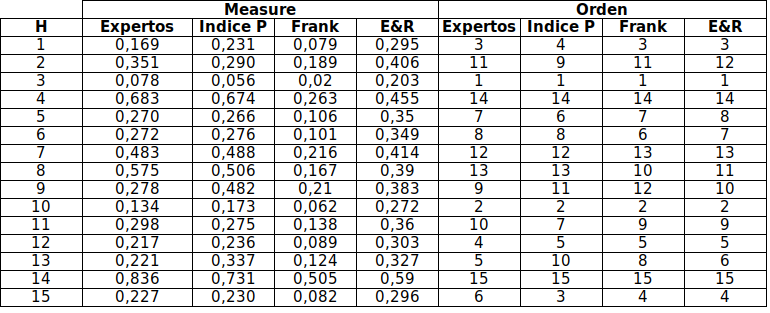



[0.07864144285434228, 0.18925994902960203, 0.01984904920603803, 0.26254067829837285, 0.1061772201529112, 0.10093609096255636, 0.21607527935698884, 0.16706332091746717, 0.21016663399333463, 0.06235738090570476, 0.1379533424818663, 0.0888100372475985, 0.12353019015879241, 0.5047936679082533, 0.08247157420113703]
Histograma 1:
  - Consensus Point: 2.94
  - Measure: 1604.6

Histograma 2:
  - Consensus Point: 1.97
  - Measure: 3861.66

Histograma 3:
  - Consensus Point: 3.0
  - Measure: 405.0

Histograma 4:
  - Consensus Point: 3.25
  - Measure: 5356.88

Histograma 5:
  - Consensus Point: 4.49
  - Measure: 2166.44

Histograma 6:
  - Consensus Point: 1.5
  - Measure: 2059.5

Histograma 7:
  - Consensus Point: 3.6
  - Measure: 4408.8

Histograma 8:
  - Consensus Point: 3.01
  - Measure: 3408.76

Histograma 9:
  - Consensus Point: 3.02
  - Measure: 4288.24

Histograma 10:
  - Consensus Point: 2.98
  - Measure: 1272.34

Histograma 11:
  - Consensus Point: 1.92
  - Measure: 2814.8

Histograma 12

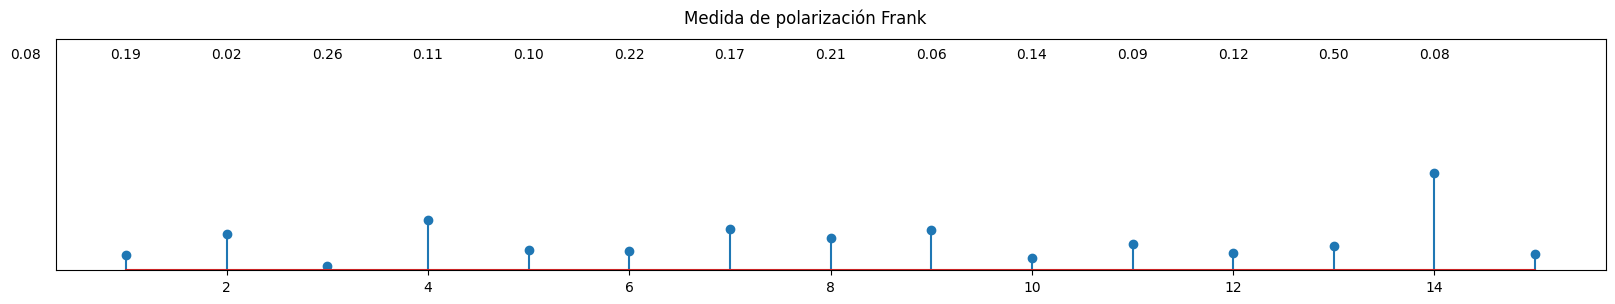

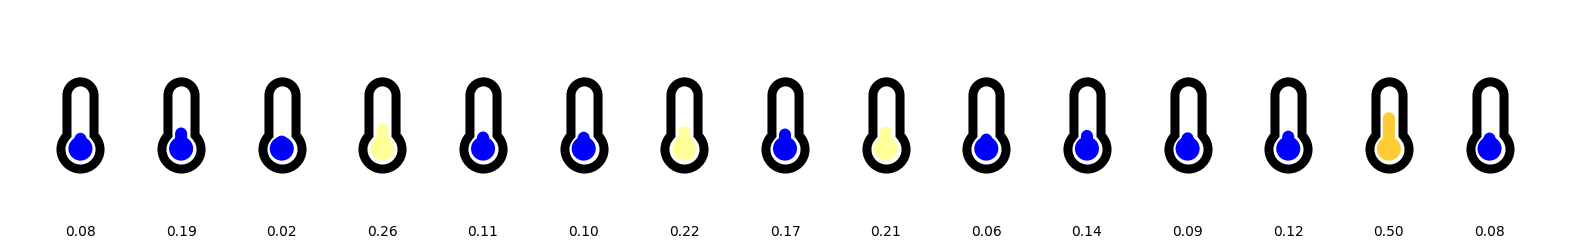

In [18]:
import numpy as np
import pandas as pd
from math import pow
from math import floor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import plotly.express as px


def calculate_y(opinions, alpha):
    numerator = sum((x * opinion**alpha) for x, opinion in enumerate(opinions, start=1))
    denominator = sum(opinion**alpha for opinion in opinions)
    return numerator / denominator

def calculate_f_y(opinions, alpha, beta, y):
    return sum(opinion**alpha * abs(x - y)**beta for x, opinion in enumerate(opinions, start=1))

# Datos proporcionados
#opinions = [12,20,40,21,7];
#opinions = [40, 11, 28, 19, 2]
#opinions = [3,	13,	69,	14,	1];
#opinions = [20, 25, 2, 28, 25];
#opinions = [3, 11, 17, 24, 45];
alpha = 2
beta = 2  # Estamos verificando para beta = 2





########################################
# Some Constants
########################################
LTITLES = ['(-2) Totalmente en desacuerdo',
           '(-1) Moderadamente en desacuerdo',
           '( 0) Ni de acuerdo, ni en desacuerdo',
           '(+1) Moderadamente de Acuerdo',
           '(+2) Totalmente de Acuerdo']

LTITLES_SHORT = [ '(-2)' , '(-1)', '(0)', '(+1)' , '(+2)']
NUMBINS = len(LTITLES)
NUMCOLS = len(LTITLES_SHORT)

COLORS = ['#d0a5c0','#ebadbc','#f8d5b9', '#fef7c9', '#b5cacb', '#b5cacb', '#f5a87d'] * 10
FIGSIZE = (20,3)

########################################
# Polarization measures
########################################


def maxPolarization(bins, beta, alpha):
    '''
    Maximal value for polarization when 1/2 of the population
    is in each extreme
    '''

    population = sum(bins)
    n = len(bins)
    binextreme = [0] * n
    binextreme[0] = floor(population/2)
    binextreme[n-1] = floor(population/2) + 1
    y_calculated = 3.0

    return calculate_f_y(binextreme, alpha, beta, y_calculated)

########################################
# Drawing thermometers
########################################
# Taken from https://stackoverflow.com/questions/54790467/how-to-plot-a-thermometer
class TemperaturePlot():

    @staticmethod
    def get_hull():
        verts1 = np.array([[0,-128],[70,-128],[128,-70],[128,0],
                          [128,32.5],[115.8,61.5],[96,84.6],[96,288],
                          [96,341],[53,384],[0,384]])
        verts2 = verts1[:-1,:] * np.array([-1,1])
        codes1 = [1,4,4,4,4,4,4,2,4,4,4]
        verts3 = np.array([[0,-80],[44,-80],[80,-44],[80,0],
                          [80,34.3],[60.7,52],[48,66.5],[48,288],
                          [48,314],[26.5,336],[0,336]])
        verts4 = verts3[:-1,:] * np.array([-1,1])
        verts = np.concatenate((verts1, verts2[::-1], verts4, verts3[::-1]))
        codes = codes1 + codes1[::-1][:-1]
        return mpath.Path(verts/256., codes+codes)

    @staticmethod
    def get_mercury(s=1):
        a = 0; b = 64; c = 35
        d = 320 - b
        e = (1-s)*d
        verts1 = np.array([[a,-b],[c,-b],[b,-c],[b,a],[b,c],[c,b],[a,b]])
        verts2 = verts1[:-1,:] * np.array([-1,1])
        verts3 = np.array([[0,0],[32,0],[32,288-e],[32,305-e],
                           [17.5,320-e],[0,320-e]])
        verts4 = verts3[:-1,:] * np.array([-1,1])
        codes = [1] + [4]*12 + [1,2,2,4,4,4,4,4,4,2,2]
        verts = np.concatenate((verts1, verts2[::-1], verts3, verts4[::-1]))
        return mpath.Path(verts/256., codes)

    def scatter(self, x,y, temp=1, tempnorm=None, ax=None, **kwargs):
        self.ax = ax or plt.gca()
        temp = np.atleast_1d(temp)
        ec = kwargs.pop("edgecolor", "black")
        kwargs.update(linewidth=0)
        self.inner = self.ax.scatter(x,y, **kwargs)
        kwargs.update(c=None, facecolor=ec, edgecolor=None, color=None)
        self.outer = self.ax.scatter(x,y, **kwargs)
        self.outer.set_paths([self.get_hull()])
        if not tempnorm:
            mi, ma = np.nanmin(temp), np.nanmax(temp)
            if mi == ma:
                mi=0
            tempnorm = plt.Normalize(mi,ma)
        ipaths = [self.get_mercury(tempnorm(t)) for t in temp]
        self.inner.set_paths(ipaths)

def color(value):
    '''Color for the thermometer'''
    if value <=0.20: return 'blue'
    if value <=0.40: return '#ffff99'
    if value <=0.60: return '#ffcc33'
    if value <=0.80: return '#ee6600'
    return '#990000'

########################################
# Input Data
########################################
dataset = pd.read_excel('datosHisto.xlsx', sheet_name='Hoja1')
NUMROWS = len(dataset.index)
NUMROUNDS = NUMROWS


rows = [ dataset.loc[i, :].values.flatten().tolist() for i in dataset.index ]
data = [ {'data' : row[1:16]} for row in rows ]

roundlabels = dataset['RONDA'].values.tolist()

#Computing Esteban & Ray for each round
y_values = [round(calculate_y(row['data'], alpha),2) for row in data]
measure = []
measure1=[]
for i, row in enumerate(data):
    y = y_values[i]  # Asociar y_values[i] con la fila de datos correspondiente
    measure.append(round(calculate_f_y(row['data'], alpha, beta, y), 2))
    measure1.append(round(calculate_f_y(row['data'], alpha, beta, y), 2)/10000)



maxmeasure = [maxPolarization(row['data'], beta, alpha) for row in data]

population =[sum(row['data']) for row in data]
measurerate = [ t[0] / t[1] for t in zip(measure, maxmeasure)]
print(measurerate)

# Imprimir resultados con explicaciones
for i, (y, m) in enumerate(zip(y_values, measure), start=1):
    print(f"Histograma {i}:")
    print(f"  - Consensus Point: {y}")
    print(f"  - Measure: {m}")
    print()

########################################
# Results and plot
########################################
plt.style.context('fivethirtyeight')
YLIM = [0, sum(data[0]['data'])]


## Distribution of the population by areas


## plots input data
print(dataset)
print([ "{:0.3f}".format(x)  for x in measurerate])

# Plot of the polarization measure
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.set_ylim(0, 1.2)
ax.tick_params(left = False, right = False , labelleft = False )
ax.stem(roundlabels,measurerate)
for idx, value in enumerate(measurerate):
        ax.text(idx,1.1,"{:.2f}".format(value),ha = 'center')

fig.suptitle("Medida de polarización Frank")
fig.savefig('4.png')

# Thermometers
fig, ax = plt.subplots(figsize=FIGSIZE)
p = TemperaturePlot()
ax.set_ylim(0, 50)
ax.axis('off')

termocolor = list(map(color, measurerate))
#p.scatter(termox, termoy, s=1500, temp=termohigh, tempnorm=(lambda x: 25 * x/2500), color=termocolor)
p.scatter( list(range(NUMROUNDS)), [20]*NUMROUNDS, s=1200, temp=measurerate, tempnorm=(lambda x: x), color=termocolor)
for idx, value in enumerate(measurerate):
        plt.text(idx,1.1,"{:.2f}".format(value),ha = 'center')

plt.savefig('5.png')

expertos =  [
    0.17,
    0.35,
    0.08,
    0.68,
    0.27,
    0.27,
    0.48,
    0.57,
    0.28,
    0.13,
    0.30,
    0.22,
    0.22,
    0.84,
    0.23
]

data = {
    'Frank Measure': measurerate,
    'Calificación promedio de los expertos': expertos,
    'Número de Ronda': range(1, len(measurerate) + 1)
}

df = pd.DataFrame(data)

# Agregar 'H' a las etiquetas
df['Ronda'] = ['H' + str(roundlabel) for roundlabel in roundlabels]

# Crear la gráfica interactiva
fig = px.scatter(
    df,
    x='Frank Measure',
    y='Calificación promedio de los expertos',
    text='Ronda',
    color='Número de Ronda',
    labels={'Frank Measure': 'Frank Measure', 'Calificación promedio de los expertos': 'Calificación promedio de los expertos'},
    title='Relación entre Frank Measure y Calificación de Expertos'
)

# Agregar la línea diagonal
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=1,
    y1=1,
    line=dict(color='blue', dash='dash'),
    name='Línea Diagonal'
)

# Agregar líneas punteadas desde cada punto hasta el eje x e y
for i in range(len(df)):
    fig.add_shape(
        type='line',
        x0=df['Frank Measure'][i],
        y0=0,
        x1=df['Frank Measure'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )
    fig.add_shape(
        type='line',
        x0=0,
        y0=df['Calificación promedio de los expertos'][i],
        x1=df['Frank Measure'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )

# Mostrar la gráfica interactiva en Google Colab
fig.show()


# Medida de Expertos

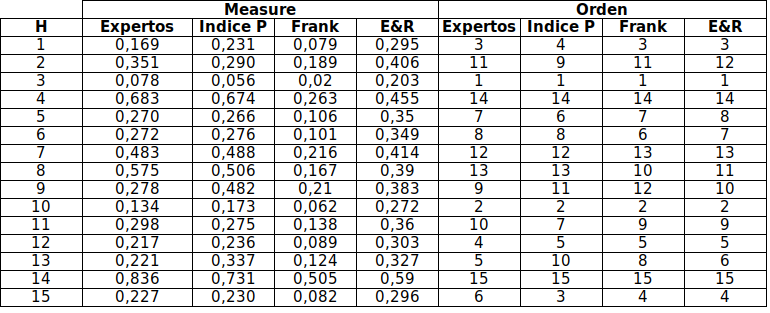


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de Excel
dataset = pd.read_excel('datosHisto.xlsx', sheet_name='Hoja1')

# Obtener el número de filas (rounds) y columnas (histogramas)
NUMROWS = len(dataset.index)
NUMROUNDS = NUMROWS

# Obtener los datos de los histogramas y etiquetas de las rondas
rows = [dataset.loc[i, :].values.flatten().tolist() for i in dataset.index]
data = [{'data': row[1:16]} for row in rows]
roundlabels = dataset['RONDA'].values.tolist()

# Definir los pesos b2, b3 y b4
b2 = 1.07
b3 = 1.35
b4 = 1.98

# Calcular el índice de polarización para cada histograma
indices_polarizacion = []

for row in data:
    histogram = row['data']
    # Calcular las frecuencias
    f2b = histogram[1] * histogram[3]
    f3 = (histogram[0] * histogram[ 3] + histogram[1] * histogram[4])
    f4 = histogram[0] * histogram[4]
    total_pairs = sum(histogram)
    # Calcular el índice de polarización
    P = round(2 * (b2 * f2b + b3 * f3 + b4 * f4) * 100 / (99 * total_pairs ** 2), 3)
    indices_polarizacion.append(P)


print(indices_polarizacion)

# Datos de los expertos
expertos =  [
    0.17,
    0.35,
    0.08,
    0.68,
    0.27,
    0.27,
    0.48,
    0.57,
    0.28,
    0.13,
    0.30,
    0.22,
    0.22,
    0.84,
    0.23
]
data = {
    'Índice Polarización': indices_polarizacion,
    'Calificación promedio de los expertos': expertos,
    'Número de Ronda': range(1, len(indices_polarizacion) + 1)
}

df = pd.DataFrame(data)

# Agregar 'H' a las etiquetas
df['Ronda'] = ['H' + str(roundlabel) for roundlabel in roundlabels]

# Crear la gráfica interactiva
fig = px.scatter(
    df,
    x='Índice Polarización',
    y='Calificación promedio de los expertos',
    text='Ronda',
    color='Número de Ronda',
    labels={'Índice Polarización': 'Índice Polarización', 'Calificación promedio de los expertos': 'Calificación promedio de los expertos'},
    title='Relación entre Índice Polarización measure y Calificación de Expertos'
)

# Agregar la línea diagonal
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=1,
    y1=1,
    line=dict(color='blue', dash='dash'),
    name='Línea Diagonal'
)

# Agregar líneas punteadas desde cada punto hasta el eje x e y
for i in range(len(df)):
    fig.add_shape(
        type='line',
        x0=df['Índice Polarización'][i],
        y0=0,
        x1=df['Índice Polarización'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )
    fig.add_shape(
        type='line',
        x0=0,
        y0=df['Calificación promedio de los expertos'][i],
        x1=df['Índice Polarización'][i],
        y1=df['Calificación promedio de los expertos'][i],
        line=dict(color='gray', dash='dash'),
    )

# Mostrar la gráfica interactiva en Google Colab
fig.show()


[0.231, 0.29, 0.056, 0.674, 0.266, 0.276, 0.488, 0.506, 0.482, 0.173, 0.275, 0.236, 0.337, 0.731, 0.23]
